In [25]:
%pip install scikit-learn -q
%pip install pandas -q
%pip install numpy -q
%pip install matplotlib -q
%pip install seaborn -q
%pip install keras -q
%pip install cvxopt -q

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
import keras
from keras import layers
import tensorflow as tf
from sklearn import preprocessing, model_selection
import random
import seaborn as sns
import cvxEDA

In [27]:
DATA_PATH = 'D:/Master of Applied IT/data/processed/WESAD'
QUALITY_THRESHOLD = 128
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = BATCH_SIZE * 2

In [28]:
dataset = pd.read_csv(DATA_PATH + "/merged_data.csv")

In [29]:
dataset.dtypes

id           object
X           float64
Y           float64
datetime    float64
Z           float64
EDA         float64
TEMP        float64
HR          float64
dtype: object

In [30]:
dataset


,id,X,Y,datetime,Z,EDA,TEMP,HR
0,S2,29.0,-6.0,1.495437e+09,55.0,0.000000,382.18,101.00
1,S2,29.0,-6.0,1.495437e+09,56.0,0.328021,382.18,101.00
2,S2,28.0,-6.0,1.495437e+09,56.0,0.410026,382.18,101.00
3,S2,29.0,-6.0,1.495437e+09,56.0,0.433090,382.18,101.00
4,S2,28.0,-6.0,1.495437e+09,55.0,0.444622,35.05,101.00
...,...,...,...,...,...,...,...,...
427785,S17,-7.0,12.0,1.502443e+09,58.0,1.542317,31.57,74.03
427786,S17,-3.0,13.0,1.502443e+09,64.0,1.562787,31.57,74.03
427787,S17,-2.0,13.0,1.502443e+09,60.0,1.700963,31.57,73.65
427788,S17,-1.0,13.0,1.502443e+09,62.0,1.748301,31.57,73.65


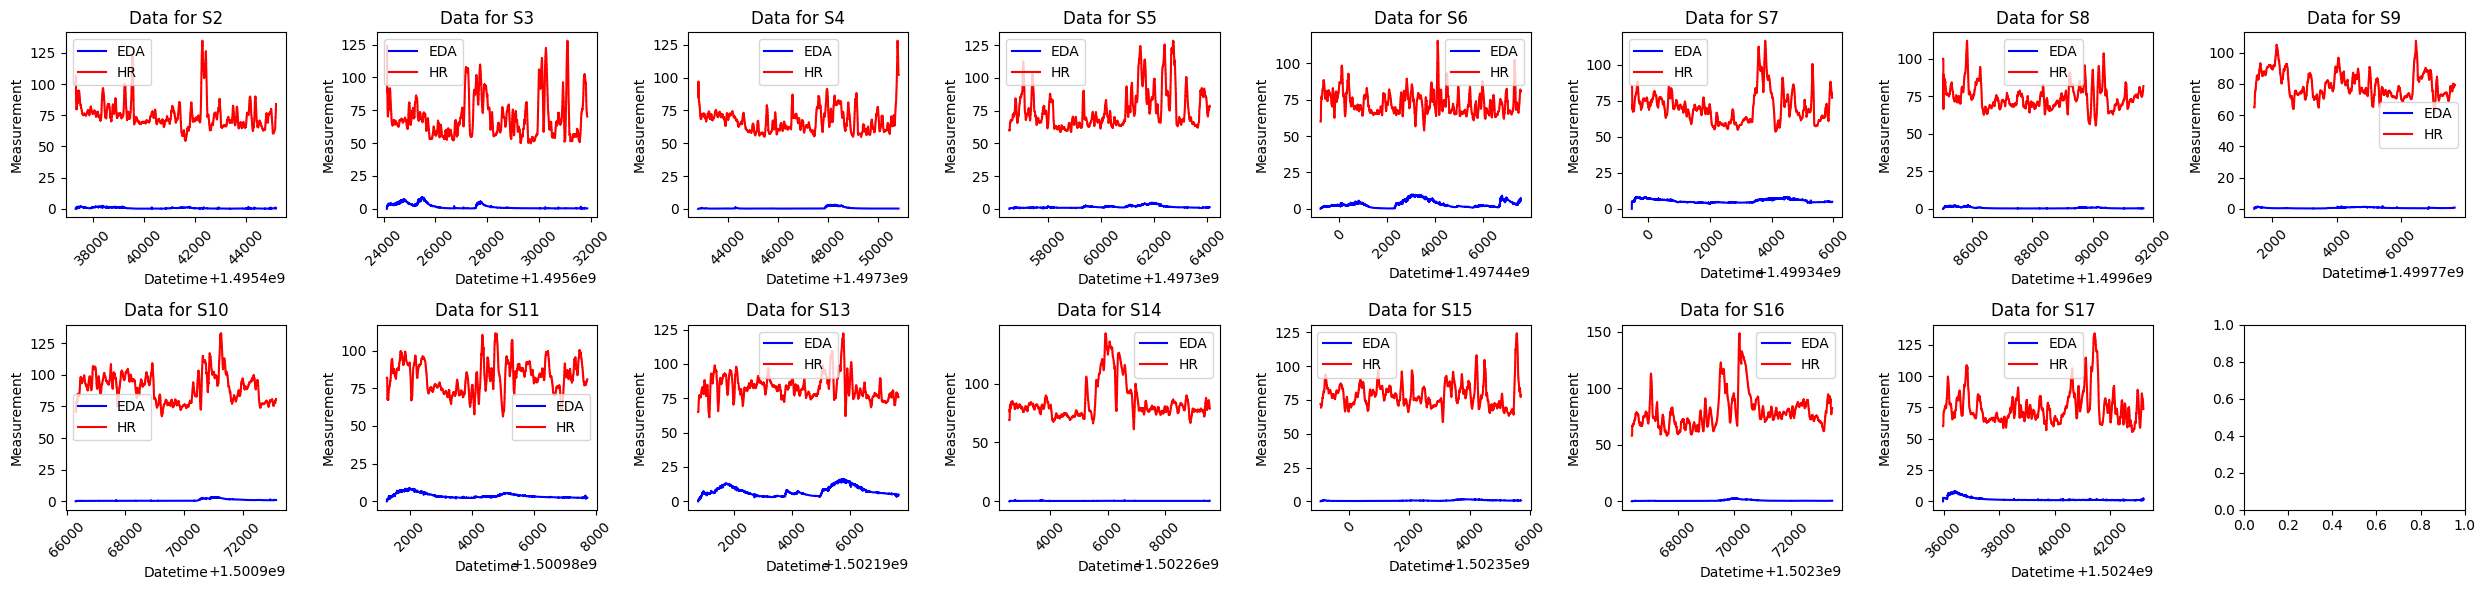

In [31]:
# Create subplots
fig, axes = plt.subplots(2, 8, figsize=(25, 6))  # Increased figure size
axes = axes.flatten()

# Define unique_ids
unique_ids = dataset['id'].unique()

# Iterate through each unique id
for i, ax in enumerate(axes):
    if i < len(unique_ids):
        # Filter data for each id
        subset_data = dataset[dataset['id'] == unique_ids[i]]
        
        # Plotting
        sns.lineplot(x='datetime', y='EDA', data=subset_data, ax=ax, color='blue', label='EDA')
        # sns.lineplot(x='datetime', y='TEMP', data=subset_data, ax=ax, color='orange', label='TEMP')
        sns.lineplot(x='datetime', y='HR', data=subset_data, ax=ax, color='red', label='HR')

        ax.set_title(f"Data for {unique_ids[i]}")
        ax.set_xlabel('Datetime')
        ax.set_ylabel('Measurement')
        ax.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

In [32]:
# Create subplots
fig, axes = plt.subplots(16, 3, figsize=(60, 40))  # Increased figure size

# Define colors for each acceleration component
colors = ['red', 'green', 'blue']

# Iterate through each unique id
for i, unique_id in enumerate(unique_ids):
    # Filter data for each id
    subset_data = dataset[dataset['id'] == unique_id]
    
    # Iterate through X, Y, and Z accelerations
    for j, accel_component in enumerate(['X', 'Y', 'Z']):
        ax = axes[i, j]  # Select the appropriate subplot
        
        # Plot acceleration component with different color
        ax.plot(subset_data['datetime'], subset_data[accel_component], label=f'{accel_component} Acceleration', color=colors[j])
        ax.set_title(f"Data for {unique_id} - {accel_component} Acceleration")
        ax.set_xlabel('Time')
        ax.set_ylabel('Acceleration')
        ax.legend()
        ax.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
def calculate_eda_levels(y):
    fs_dict = {'ACC': 32, 'BVP': 64, 'EDA': 4, 'TEMP': 4, 'label': 700, 'Resp': 700}
    Fs = fs_dict['EDA']
    yn = (y - y.mean()) / y.std()
    [r, p, t, l, d, e, obj] = cvxEDA.cvxEDA(yn, 1. / Fs)
    return [p, t]

# Example usage:

phasic, tonic = calculate_eda_levels(dataset['EDA'].values)
print("Phasic EDA:", phasic)
print("Tonic EDA:", tonic)


     pcost       dcost       gap    pres   dres
 0: -2.1376e+05 -2.1327e+05  8e+05  1e+03  3e-01
 1: -2.1333e+05 -2.8951e+05  8e+04  1e+02  3e-02
 2: -2.1326e+05 -2.4041e+05  3e+04  3e+01  7e-03
 3: -2.1318e+05 -2.3280e+05  2e+04  2e+01  5e-03
 4: -2.1316e+05 -2.2142e+05  8e+03  7e+00  2e-03
 5: -2.1305e+05 -2.1690e+05  4e+03  2e+00  6e-04
 6: -2.1305e+05 -2.1532e+05  2e+03  1e+00  3e-04
 7: -2.1343e+05 -2.1390e+05  5e+02  6e-02  2e-05
 8: -2.1357e+05 -2.1387e+05  3e+02  4e-02  9e-06
 9: -2.1369e+05 -2.1386e+05  2e+02  2e-02  4e-06
10: -2.1376e+05 -2.1386e+05  9e+01  6e-03  2e-06
11: -2.1381e+05 -2.1385e+05  5e+01  3e-03  6e-07
12: -2.1383e+05 -2.1385e+05  2e+01  8e-04  2e-07
13: -2.1384e+05 -2.1385e+05  1e+01  3e-04  8e-08
14: -2.1385e+05 -2.1385e+05  5e+00  1e-04  3e-08
15: -2.1385e+05 -2.1385e+05  2e+00  2e-05  6e-09


KeyboardInterrupt: 